## Figure 2D-E

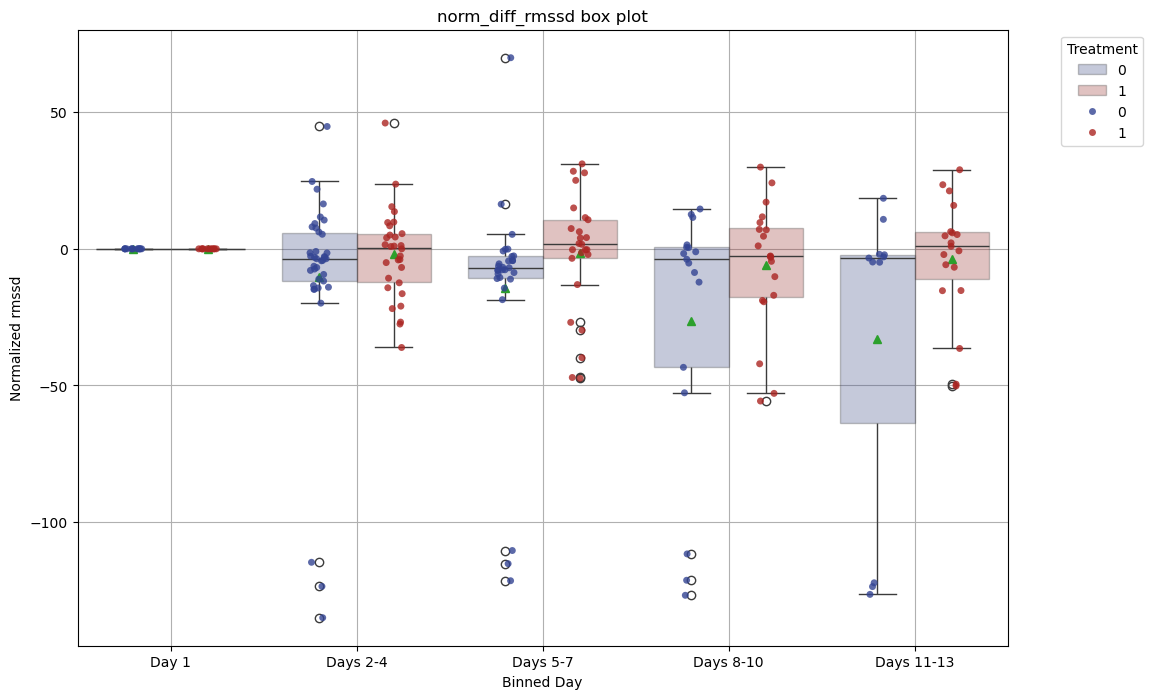

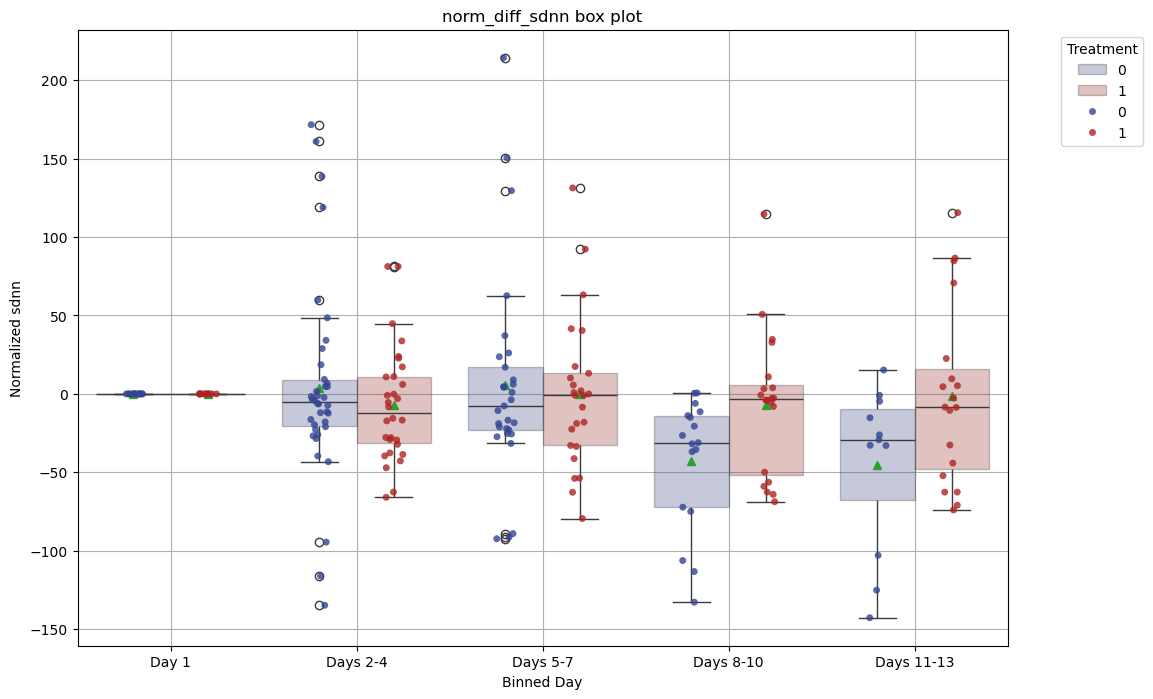

In [8]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import logging
df_hrv = pd.read_csv('df_hrv_sum.csv', index_col=0)
# define helper function for normalization and day binning
def find_valid_baseline(df, subj, feature):
    # Define the order of days to check for a valid baseline
    days_to_check = [1] + [day for day in range(-1, 3) if day != 1]  # Starts with day 1, then checks days -1, 0, 2, 
    
    for day in days_to_check:
        baseline = df[(df['subj'] == subj) & (df['research_day'] == day)][feature].values
        if len(baseline) > 0 and not np.isnan(baseline[0]):
            # print(f"use day {day} as baseline Subject {subj} - {feature}")
            return baseline[0]
    
    # print(f"No valid baseline found for Subject {subj} - {feature}")
    return None
def assign_3_day_bin(day):
    if day == 1:
        return 'Day 1'
    else:
        bin_num = ((day - 2) // 3) + 1
        start_day = 3 * bin_num - 1
        end_day = start_day + 2
        return f'Days {start_day}-{end_day}'

# main script
features_of_interest = ['rmssd', 'sdnn']
for feature in features_of_interest:
    for subj in df_hrv['subj'].unique():
        baseline = find_valid_baseline(df_hrv, subj, feature)
        if baseline is not None:
            df_hrv.loc[df_hrv['subj'] == subj, 'norm_diff_' + feature] = \
            df_hrv[df_hrv['subj'] == subj][feature] - baseline
        else:
            pass  



df2plot = df_hrv.copy()
df2plot = df2plot[(df2plot['research_day'] <=13) & (df2plot['research_day'] >=1)]
df2plot['day_bin'] = df2plot['research_day'].apply(assign_3_day_bin)
# set pallete
treatment_color = "#AB2522"
non_treatment_color = "#334493"
hue_order = [0, 1]
palette = {0: non_treatment_color, 1: treatment_color} 

for feature in features_of_interest:
    plt.figure(figsize=(12, 8))
    norm_type = 'norm_diff_'
    sns.boxplot(x='day_bin', y=f'{norm_type}{feature}', hue='treatment', data=df2plot,
                palette=palette, showmeans=True, boxprops=dict(alpha=.3))
    sns.stripplot(x='day_bin', y=f'{norm_type}{feature}', hue='treatment', data=df2plot,
                  hue_order=hue_order, palette=palette, dodge=True, jitter=True, alpha=0.8)
    plt.title(f'{norm_type}{feature} box plot')
    plt.xlabel('Binned Day')
    plt.ylabel('Normalized ' + feature)
    plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc=2)
    plt.grid(True)
    plt.show()